<a href="https://colab.research.google.com/github/IbrahimBajwa313/Data-Science/blob/master/LinearRegressionon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --------------------
# 1. Import libraries
# --------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# --------------------
# 2. Load dataset
# --------------------
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("insurance.csv")

print("Head of dataset:")
print(df.head())
print("\nInfo:")
print(df.info())
print("\nDescription:")
print(df.describe())


TypeError: 'NoneType' object is not subscriptable

In [ ]:
print("\nNull values:\n", df.isnull().sum())

In [ ]:
print(df.duplicated().sum())

In [ ]:
# Visualizations
sns.histplot(df["charges"], kde=True)
plt.title("Charges Distribution")
plt.show()


sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# no missing values thats why the plot is empty

In [ ]:
le = LabelEncoder()
for col in ["sex", "smoker", "region"]:
    df[col] = le.fit_transform(df[col])  # Indent this line

# Scale numeric features
scaler = StandardScaler()
numeric_cols = ["age", "bmi", "children"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.describe()

In [ ]:
# Split data
# --------------------
X = df.drop("charges", axis=1)
y = df["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)


In [ ]:
# 6. Train Linear Regression
# --------------------
regressor = LinearRegression()
regressor.fit(X_train, y_train)


print("\nSlope (coefficients):", regressor.coef_)
print("Intercept:", regressor.intercept_)


Slope (coefficients): [ 3812.24215641   -42.86029121  2066.39789041   727.20265898
 23227.46587524  -292.7804862 ]
Intercept: 8885.93949709385


In [ ]:
# 7. Model Evaluation
# --------------------
y_pred = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 37726891.07038927
RMSE: 6142.221997810668
R²: 0.7918111887183533


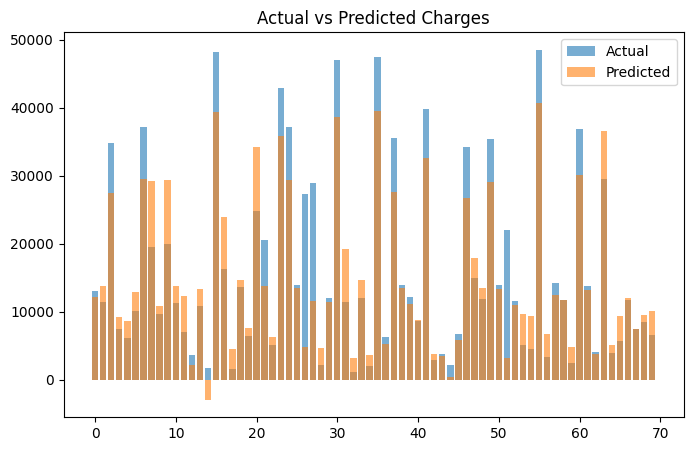

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.bar(range(len(y_test)), y_test.values, alpha=0.6, label="Actual")
plt.bar(range(len(y_pred)), y_pred, alpha=0.6, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Charges")
plt.show()

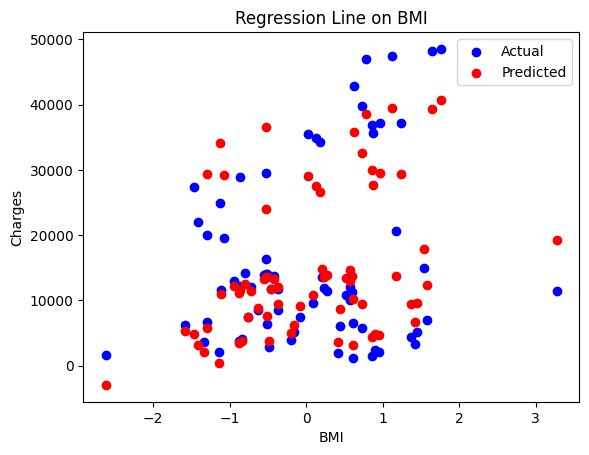

In [ ]:
# Regression line (for 1 feature like BMI)
plt.scatter(X_test["bmi"], y_test, color="blue", label="Actual")
plt.scatter(X_test["bmi"], y_pred, color="red", label="Predicted")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Regression Line on BMI")
plt.legend()
plt.show()

In [ ]:
# Gradient Descent Function
def gradient_descent(x, y, lr=0.01, epochs=1000):
    n = len(x)
    m = 0  # Slope
    b = 0  # Intercept
    cost_list = []

    for _ in range(epochs):
        y_pred = m * x + b
        error = y - y_pred
        cost = (error ** 2).mean()
        cost_list.append(cost)

        m_grad = -(2/n) * sum(x * error)
        b_grad = -(2/n) * sum(error)

        m -= lr * m_grad
        b -= lr * b_grad

    return m, b, cost_list


In [ ]:
# Extracting BMI values
X_bmi = X_train["bmi"].values
y_bmi = y_train.values

# Calling the gradient descent function
m, b, costs = gradient_descent(X_bmi, y_bmi, lr=0.01, epochs=1000)

print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): 2458.0608787070637
Intercept (b): 13541.352089301756


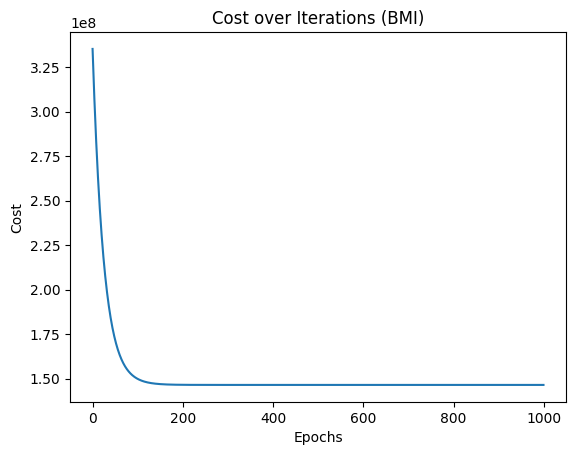

In [ ]:
plt.plot(costs)
plt.title("Cost over Iterations (BMI)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()

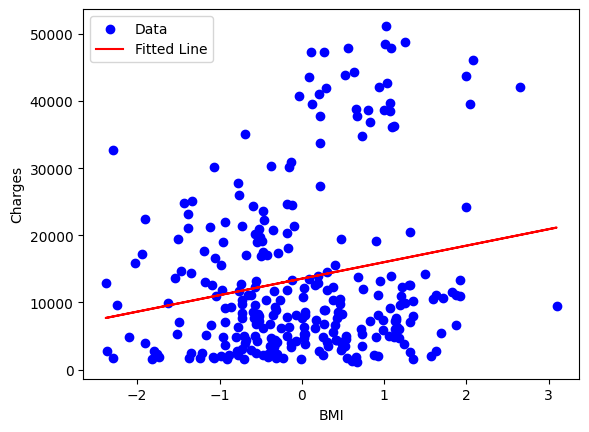

In [ ]:
# Predict line
plt.scatter(X_bmi, y_bmi, color="blue", label="Data")
plt.plot(X_bmi, m*X_bmi+b, color="red", label="Fitted Line")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [ ]:
# ======================================================
# Task 2: Salary Prediction with Gradient Descent
# ======================================================